In [1]:
# make scatter plots for ML prediction on MEM and EF scores.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from sklearn.metrics import r2_score
from scipy import stats


input_dir = 'adni_out05_composite_score_prediction_entropy'
output_dir = 'adni_out06_composite_score_prediction_entropy_plot'

if not os.path.exists(output_dir):
    os.mkdir(output_dir)
    


In [2]:
# sns.xkcd_rgb["black"]
# sns.color_palette("husl", 10)

colors = sns.color_palette("Paired")
sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [5]:
pvalue

2.3076151813180337e-07

adni_out05_composite_score_prediction_entropy/scatter_data_svr_freq0.csv
adni_out05_composite_score_prediction_entropy/scatter_data_svr_freq1.csv
adni_out05_composite_score_prediction_entropy/scatter_data_svr_freq2.csv
adni_out05_composite_score_prediction_entropy/scatter_data_svr_freq3.csv
adni_out05_composite_score_prediction_entropy/scatter_data_svr_freq4.csv
adni_out05_composite_score_prediction_entropy/scatter_data_svr_freq5.csv
adni_out05_composite_score_prediction_entropy/scatter_data_svr_freq6.csv
adni_out05_composite_score_prediction_entropy/scatter_data_svr_freq7.csv
adni_out05_composite_score_prediction_entropy/scatter_data_svr_freq8.csv
adni_out05_composite_score_prediction_entropy/scatter_data_svr_freq9.csv


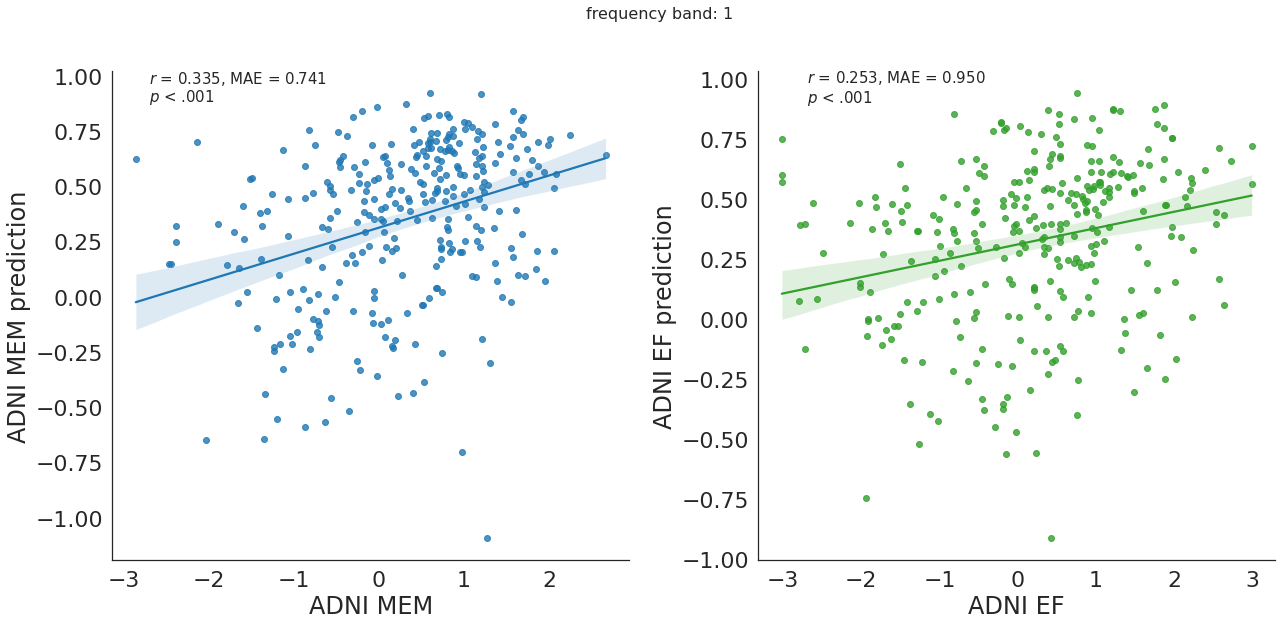

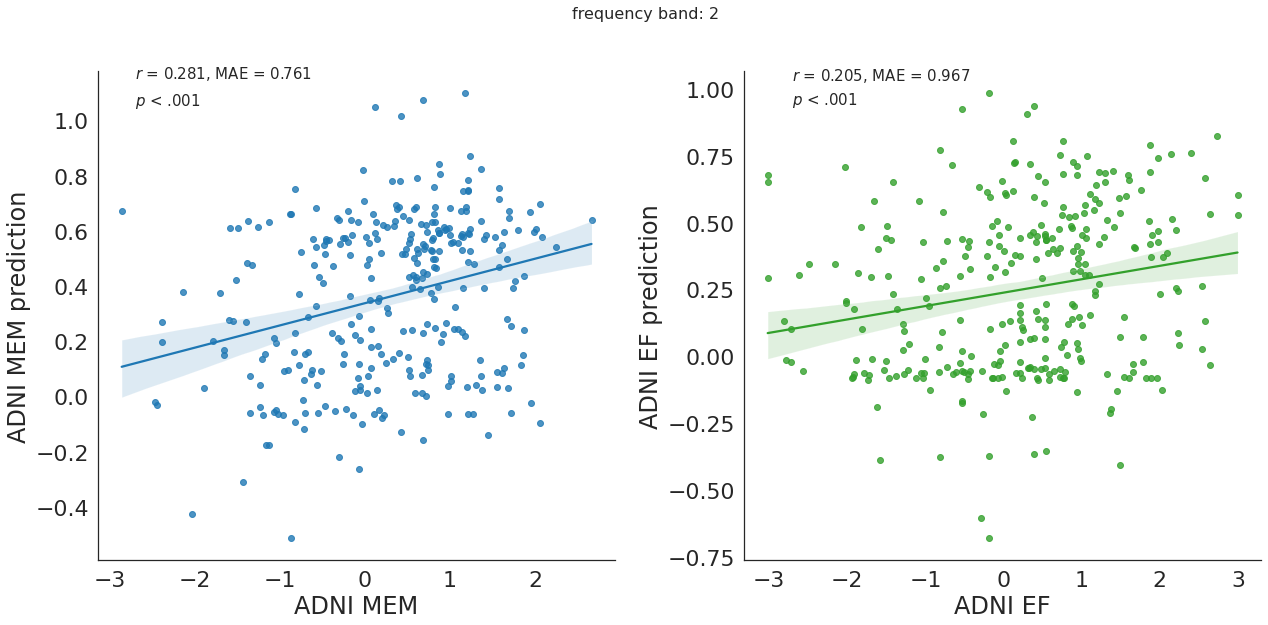

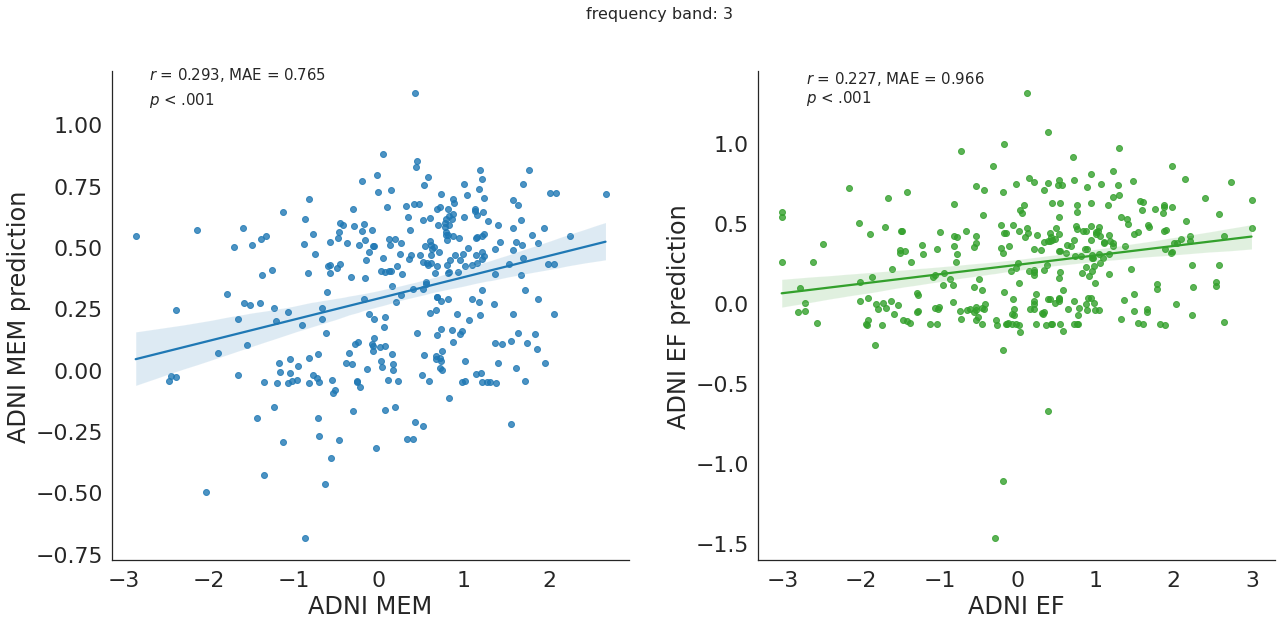

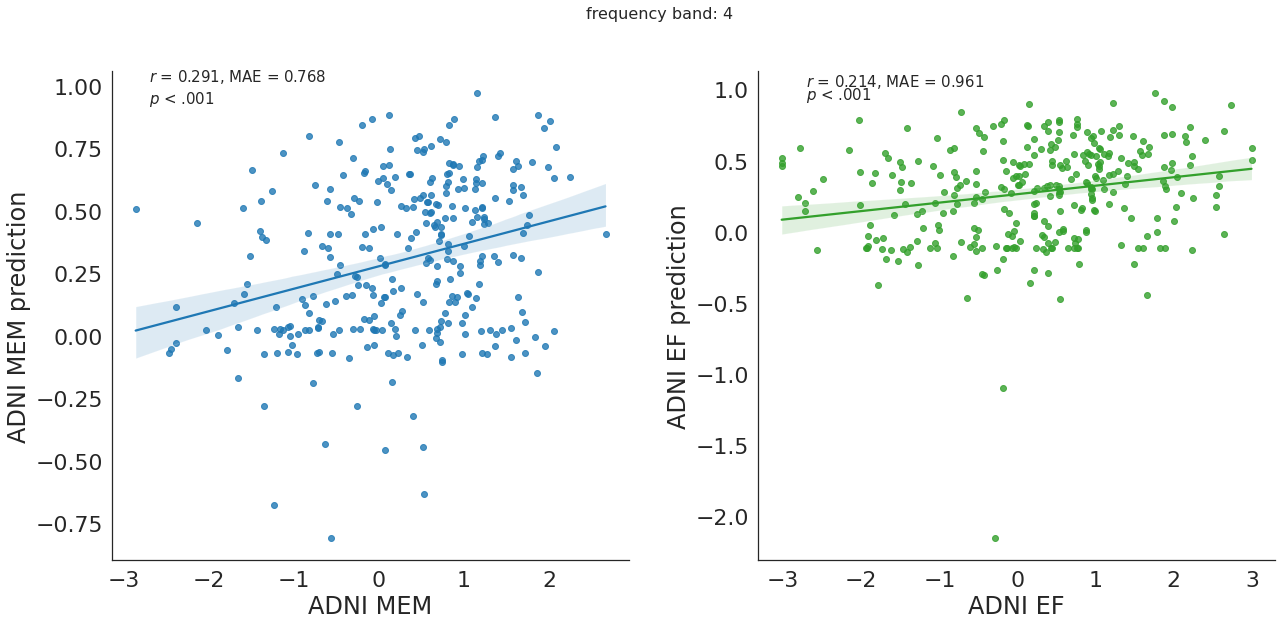

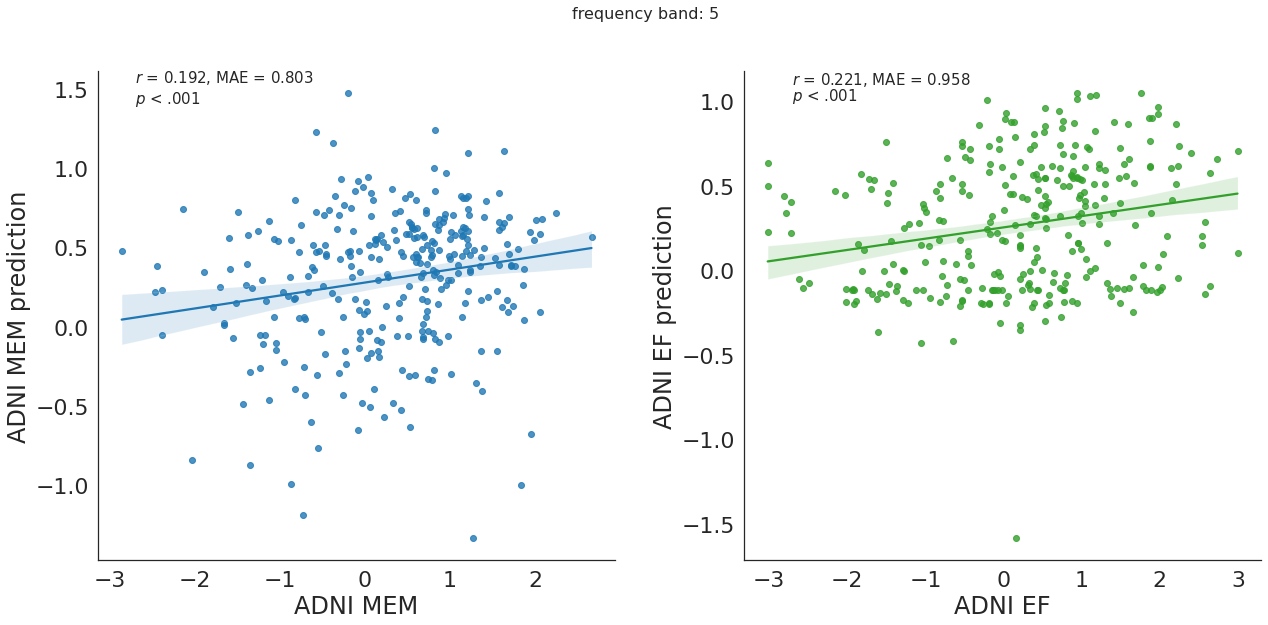

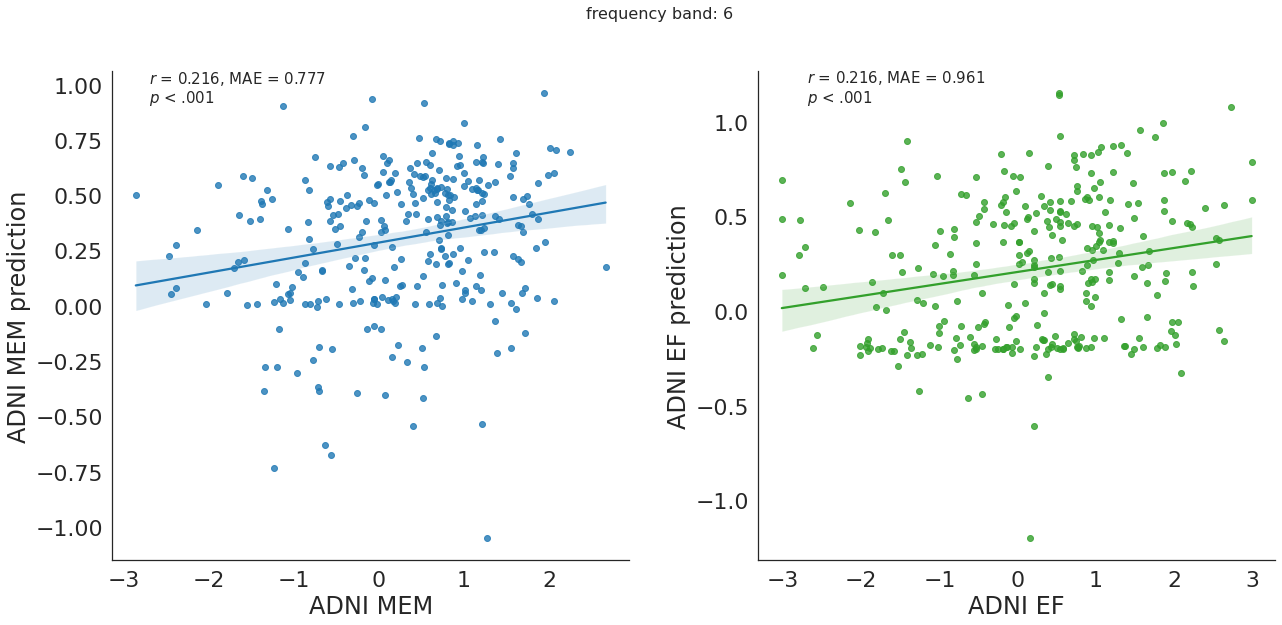

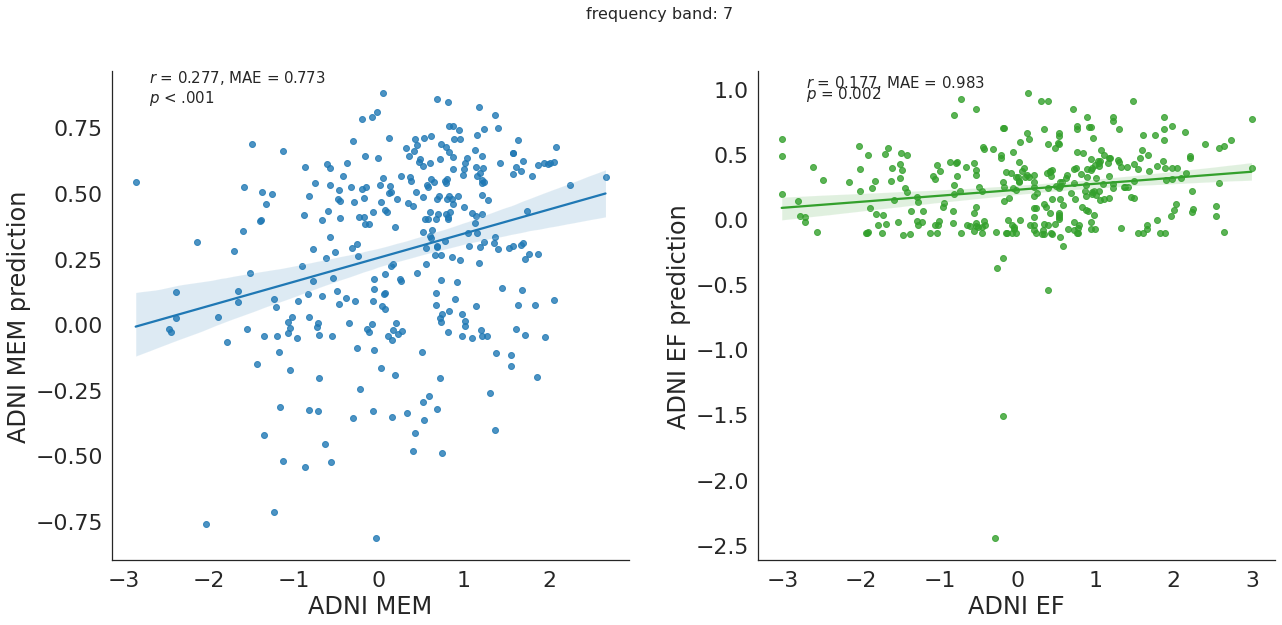

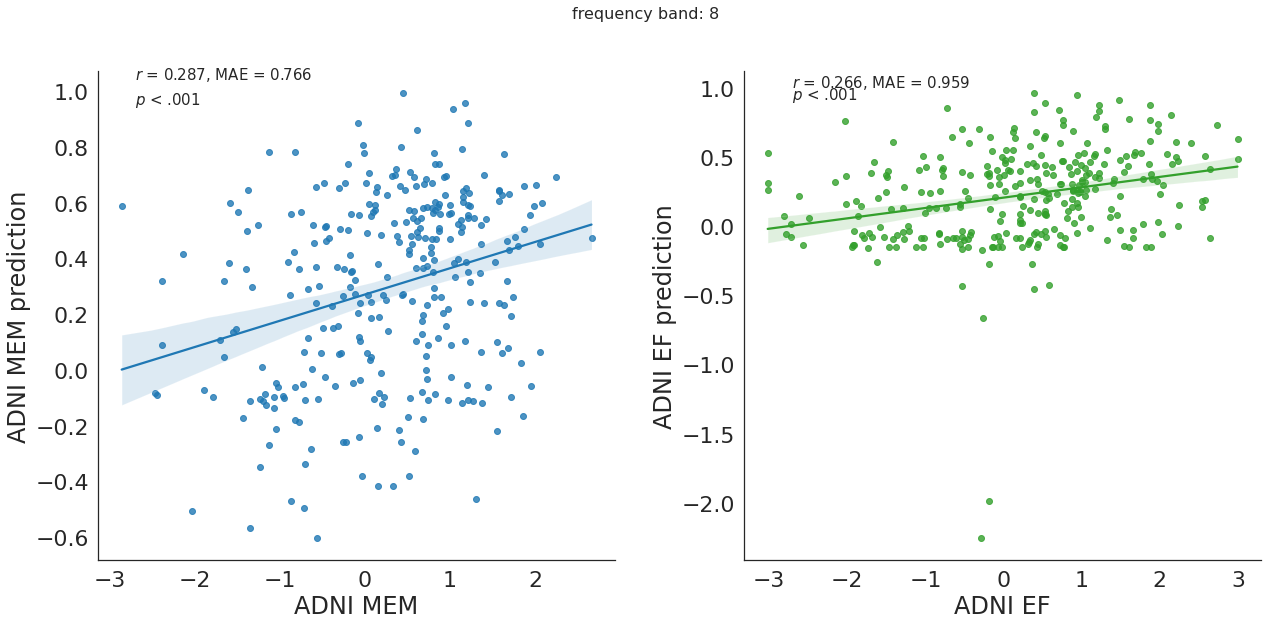

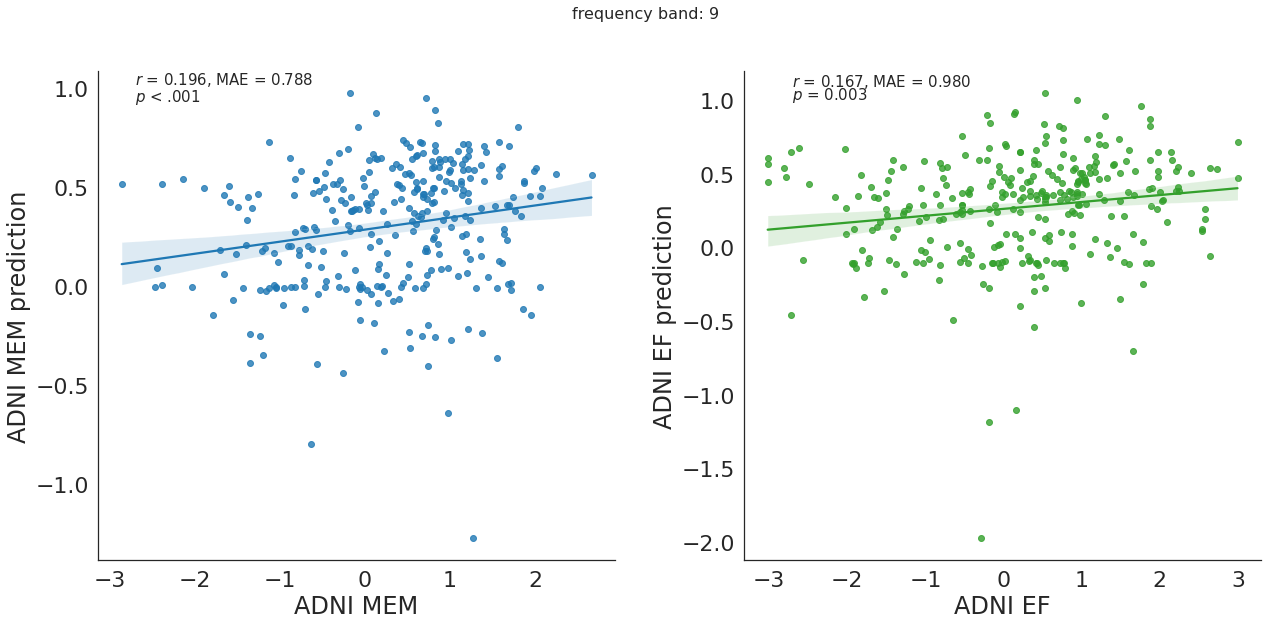

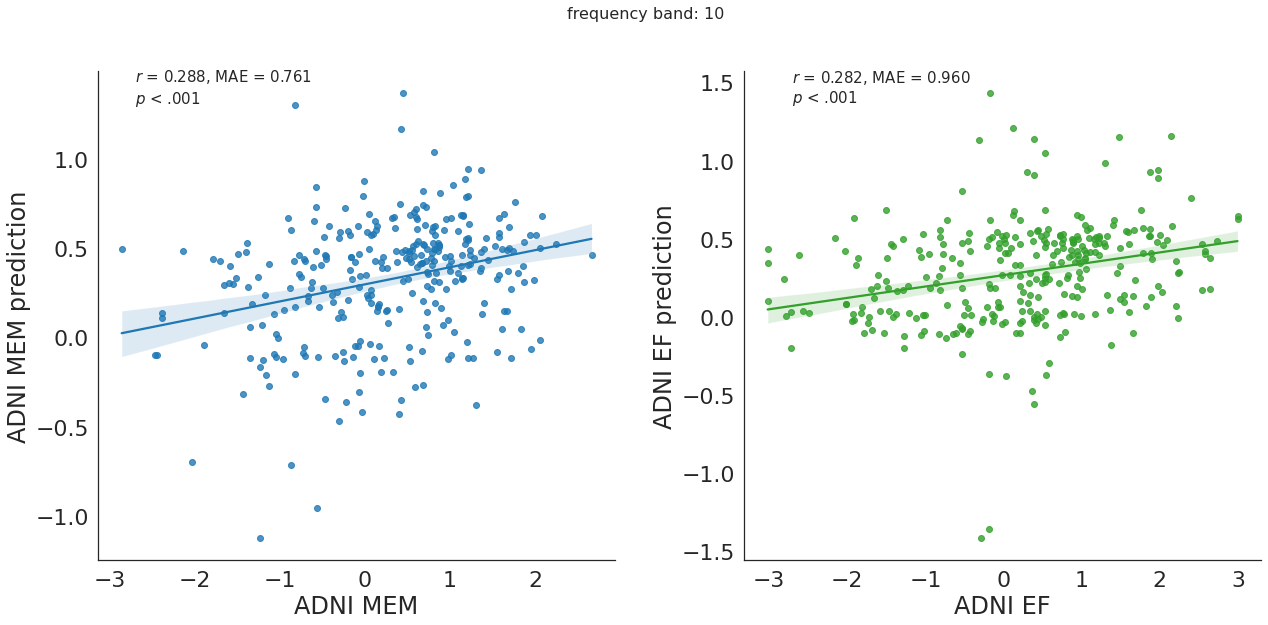

In [12]:
sns.set(rc={'figure.figsize':(19, 9)}, font_scale = 2)
sns.set_style("white")

files = glob.glob(input_dir + '/scatter_data_svr_freq?.csv')
# files = glob.glob(input_dir + '/scatter_data_ridge_freq?.csv')

files.sort()

i = 1
for f in files:

    print(f)
    scatter_data = pd.read_csv(f, index_col = 0)
    
    pearsonr, pvalue = stats.pearsonr(scatter_data['ADNI_MEM'], scatter_data['ADNI_MEM_pred'])

    fig = plt.figure(constrained_layout=False)
    gs = fig.add_gridspec(nrows=1, ncols=2, left=0.1, right=0.95, wspace=0.25, hspace = .25)

    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])

    sns.regplot(x="ADNI_MEM", y="ADNI_MEM_pred", data=scatter_data, ax = ax1, color = colors[1])
    ax1.set(xlabel='ADNI MEM', ylabel='ADNI MEM prediction')

    label = "$r$ = %.3f, MAE = %.3f" % (pearsonr, np.mean(np.abs(scatter_data['ADNI_MEM'] - scatter_data['ADNI_MEM_pred'])))
    if pvalue < .001:
        label2 = "$p$ < .001"
    else:
        label2 = "$p$ = %.3f" % pvalue
    
    ax1.text(-2.7, 1.05 * np.max(scatter_data['ADNI_MEM_pred'].values), label, fontsize = 15)
    ax1.text(-2.7, .96 * np.max(scatter_data['ADNI_MEM_pred'].values), label2, fontsize = 15)
    ax1.spines.right.set_visible(False)
    ax1.spines.top.set_visible(False)

    pearsonr, pvalue = stats.pearsonr(scatter_data['ADNI_EF'], scatter_data['ADNI_EF_pred'])
    if pvalue < .001:
        label2 = "$p$ < .001"
    else:
        label2 = "$p$ = %.3f" % pvalue

    sns.regplot(x="ADNI_EF", y="ADNI_EF_pred", data=scatter_data, ax = ax2, color = colors[3])
    ax2.set(xlabel='ADNI EF', ylabel='ADNI EF prediction')

    label = "$r$ = %.3f, MAE = %.3f" % (pearsonr, np.mean(np.abs(scatter_data['ADNI_EF'] - scatter_data['ADNI_EF_pred'])))
    ax2.text(-2.7, 1.05 * np.max(scatter_data['ADNI_EF_pred'].values), label, fontsize = 15)
    ax2.text(-2.7, .96 * np.max(scatter_data['ADNI_EF_pred'].values), label2, fontsize = 15)
    ax2.spines.right.set_visible(False)
    ax2.spines.top.set_visible(False)
    
    fig.suptitle('frequency band: %d' % i, fontsize=16)
    i += 1
    plt.savefig(f.replace('csv', 'png'), dpi = 300)    
    

